In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint as pp

# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

1008

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
# api_key = api_keys.api_key

# Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
test_city = 'montreal'

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
test = f"{url}appid={api_key}&units={units}&q={test_city}"

response = requests.get(test).json()
pp(response)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 45.5, 'lon': -73.61},
 'dt': 1533675600,
 'id': 6077243,
 'main': {'humidity': 61,
          'pressure': 1011,
          'temp': 27.62,
          'temp_max': 28,
          'temp_min': 27},
 'name': 'Montreal',
 'sys': {'country': 'CA',
         'id': 3829,
         'message': 0.0043,
         'sunrise': 1533635189,
         'sunset': 1533687172,
         'type': 1},
 'visibility': 48279,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 5.1}}


In [4]:
# DataFrame creation with all required information
weather_data = pd.DataFrame({'City Name': cities,
                             'Name': '',
                             'Country': '',
                             'Latitude': '',
                             'Temperature (C)': '',
                             'Humidity': '',
                             'Cloud Cover (%)': '',
                             'Wind Speed (km/h)': ''})
weather_data.head()

,City Name,Name,Country,Latitude,Temperature (C),Humidity,Cloud Cover (%),Wind Speed (km/h)
0,hobart,,,,,,,
1,deputatskiy,,,,,,,
2,gigmoto,,,,,,,
3,mataura,,,,,,,
4,madison,,,,,,,


In [5]:
# Loop API requests for each city in DataFrame to get all the relevant data
for index, city in weather_data.iterrows():
    response = requests.get(query_url + city[0]).json()
    print({city[0]})
    try:
        weather_data.loc[index, 'Name'] = response['name']
        weather_data.loc[index, 'Country'] = response['sys']['country']
        weather_data.loc[index, 'Latitude'] = response['coord']['lat']
        weather_data.loc[index, 'Temperature (C)'] = response['main']['temp']
        weather_data.loc[index, 'Humidity'] = response['main']['humidity']
        weather_data.loc[index, 'Cloud Cover (%)'] = response['clouds']['all']
        weather_data.loc[index, 'Wind Speed (km/h)'] = response['wind']['speed']
    except KeyError:
        print(f"--- Skipping ", {city[0]})
        pass

print('----------------------')
print('Complete')

# for city in cities:
#     response = requests.get(query_url + city).json()
#     temp.append(response['main']['temp'])
#     hum.append(response['main']['humidity'])
#     cloud.append(response['clouds']['all'])
#     wnd_spd.append(response['wind']['speed'])
    
# print(f"The tempurature is: {temp}")
# print(f"The humidity is: {hum}")
# print(f"The cloud cover is: {cloud}")
# print(f"The wind speed is: {wnd_spd}")

{'hobart'}
{'deputatskiy'}
{'gigmoto'}
{'mataura'}
{'madison'}
{'puerto ayora'}
{'mys shmidta'}
--- Skipping  {'mys shmidta'}
{'la ronge'}
{'mayumba'}
{'somerset'}
{'albany'}
{'aosta'}
{'bredasdorp'}
{'kaitangata'}
{'avarua'}
{'lompoc'}
{'kruisfontein'}
{'quatre cocos'}
{'jacareacanga'}
{'richmond'}
{'kapaa'}
{'jamestown'}
{'ostrovnoy'}
{'vila franca do campo'}
{'dawei'}
{'malangali'}
{'port alfred'}
{'fukue'}
{'airai'}
{'marawi'}
{'addi ugri'}
--- Skipping  {'addi ugri'}
{'saskylakh'}
{'aklavik'}
{'atuona'}
{'maubin'}
{'kankavli'}
--- Skipping  {'kankavli'}
{'barentsburg'}
--- Skipping  {'barentsburg'}
{'kodiak'}
{'belushya guba'}
--- Skipping  {'belushya guba'}
{'ushuaia'}
{'gisborne'}
{'vaitupu'}
--- Skipping  {'vaitupu'}
{'touros'}
{'nikolskoye'}
{'chumikan'}
{'tumannyy'}
--- Skipping  {'tumannyy'}
{'rikitea'}
{'cape town'}
{'perpignan'}
{'hilo'}
{'nizhneyansk'}
--- Skipping  {'nizhneyansk'}
{'dinguiraye'}
{'salalah'}
{'bambous virieux'}
{'bethel'}
{'rafai'}
{'mao'}
{'byron bay'}
{

In [6]:
# Update the weather_data DataFrame with the data
weather_data = pd.DataFrame({'City': weather_data['Name'],
                             'Country': weather_data['Country'],
                             'Latitude': weather_data['Latitude'],
                             'Temperature (C)': weather_data['Temperature (C)'],
                             'Humidity': weather_data['Humidity'],
                             'Cloud Cover (%)': weather_data['Cloud Cover (%)'],
                             'Wind Speed (km/h)': weather_data['Wind Speed (km/h)']})

# Data clean up
weather_data['Temperature (C)'].replace('', np.nan, inplace=True)
weather_data.dropna(subset=['Temperature (C)'], how='any', inplace=True)

weather_data.head()

,City,Country,Latitude,Temperature (C),Humidity,Cloud Cover (%),Wind Speed (km/h)
0,Hobart,AU,-42.88,10.00,71,40,8.2
1,Deputatskiy,RU,69.3,7.58,73,0,1.87
2,Gigmoto,PH,13.78,27.83,100,92,7.67
3,Mataura,NZ,-46.19,0.58,83,8,1.27
4,Madison,US,43.07,21.85,83,90,2.6


## Latitude vs Temperature Plot

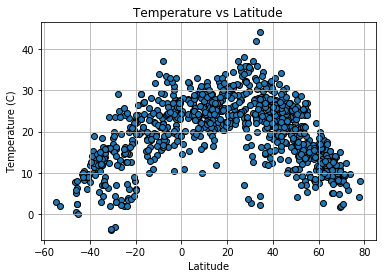

In [7]:
# Scatter Plot creation
lat_temp = plt.scatter(weather_data['Latitude'], weather_data['Temperature (C)'], marker='o', edgecolors='black')

# Figure formatting
plt.gcf().set_facecolor('white')
plt.title('Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.grid()

# Save Figure
plt.savefig('Analysis/Temperature_vs_Latitude.png')
plt.show()

## Latitude vs. Humidity Plot

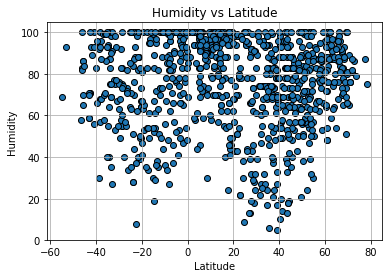

In [8]:
# Scatter Plot creation
lat_hum = plt.scatter(weather_data['Latitude'], weather_data['Humidity'], marker='o', edgecolors='black')

# Figure formatting
plt.gcf().set_facecolor('white')
plt.title('Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save Figure
plt.savefig('Analysis/Humidity_vs_Latitude.png')
plt.show()

## Latitude vs. Cloudiness Plot

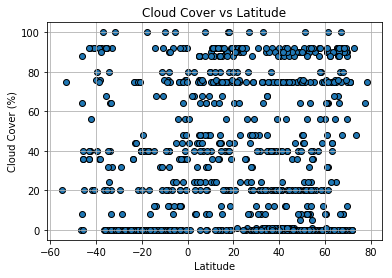

In [9]:
# Scatter Plot creation
lat_hum = plt.scatter(weather_data['Latitude'], weather_data['Cloud Cover (%)'], marker='o', edgecolors='black')

# Figure formatting
plt.gcf().set_facecolor('white')
plt.title('Cloud Cover vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.grid()

# Save Figure
plt.savefig('Analysis/CloudCover_vs_Latitude.png')
plt.show()

## Latitude vs. Wind Speed Plot

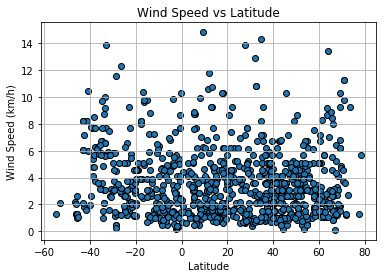

In [10]:
# Scatter Plot creation
lat_hum = plt.scatter(weather_data['Latitude'], weather_data['Wind Speed (km/h)'], marker='o', edgecolors='black')

# Figure formatting
plt.gcf().set_facecolor('white')
plt.title('Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.grid()

# Save Figure
plt.savefig('Analysis/WindSpeed_vs_Latitude.png')
plt.show()